<a href="https://colab.research.google.com/github/ManeeshDhu/Discrete_Math/blob/main/RegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [3]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In the simple linear regression, more goals (G) are associated with more points (PTS). In the multiple regression (Goals and Assists vs. Points), both goals and assists (A) positively impact points, suggesting that players with higher goals and assists tend to have more points.

In [12]:
from sklearn.linear_model import LinearRegression
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [13]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)

In [14]:
# goals vs points
linear_model = LinearRegression()
linear_model.fit(x[:, 0].reshape(-1, 1), y)


LinearRegression()

In [15]:
# Multiple Regression: Goals and Assists vs Points
multiple_model = LinearRegression()
multiple_model.fit(x, y)

LinearRegression()

In [16]:
print("Simple Linear Regression :", linear_model.coef_)
print("Multiple Regression :", multiple_model.coef_)

Simple Linear Regression Coefficients: [2.17678045]
Multiple Regression Coefficients: [1. 1.]


## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [19]:
# Select features and target
X = df[['Appearances', 'Honorary']]
y = df['Death1']

In [26]:
encoder = LabelEncoder()
df['Honorary'] = encoder.fit_transform(df['Honorary'])


In [39]:

# Fit a logistic regression model
model = LogisticRegression().fit(X, y)

# Make a probability prediction for your favorite character
favorite_character_appearances = 100
probability_of_death = model.predict_proba([[favorite_character_appearances]])[:, 1]

print(f"Probability of Death for Your Favorite Character: {probability_of_death[0]:.2f}")



Probability of Death for Your Favorite Character: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


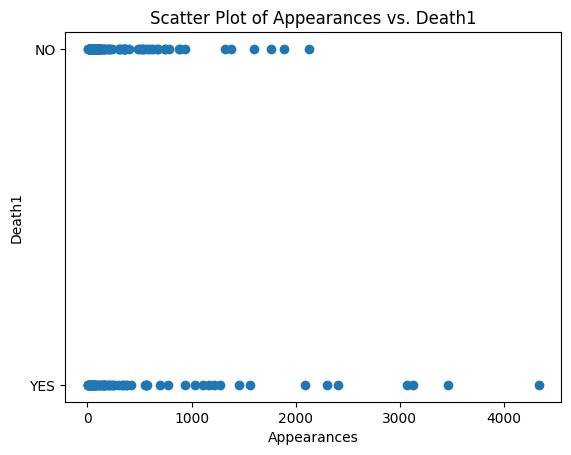

In [37]:
# Scatter plot
plt.scatter(df['Appearances'], df['Death1'])
plt.xlabel('Appearances')
plt.ylabel('Death1')
plt.title('Scatter Plot of Appearances vs. Death1')
plt.show()


## Find Your Own Regression
Polynomial Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')


In [57]:

# Extract Games and Time data
games = np.array(df['Games']).reshape(-1, 1)
times = np.array(df['Time'])



In [59]:
# Fit a Linear Regression model
model = LinearRegression().fit(games, times)

# Predict Olympic Records for 2024 and 2300
games_to_predict = np.array([[2024], [2300]])
predicted_times = model.predict(games_to_predict)



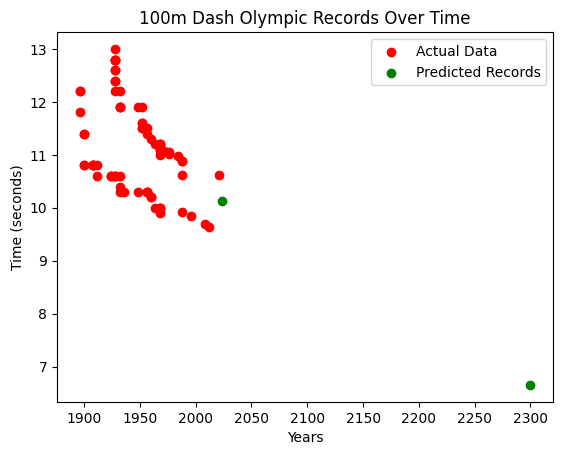

In [64]:
# Plot the actual data and predicted records
plt.scatter(games, times, label='Actual Data', color='red')
plt.scatter(games_to_predict, predicted_times, color='green', marker='o', label='Predicted Records')
plt.xlabel('Years')
plt.ylabel('Time (seconds)')
plt.title('100m Dash Olympic Records Over Time')
plt.legend()
plt.show()



In [ ]:
# Output the predictions
for year, time in zip(games_to_predict, predicted_times):
    print(f"Predicted Olympic Record for {year[0]}: {time:.2f} seconds"